In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [12]:
df = pd.read_csv('Titanic-Dataset.csv')
print("Original DataFrame:\n", df.head())

Original DataFrame:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.050

In [13]:
print("\nMissing Values Count:\n")
print(df.isnull().sum())


Missing Values Count:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


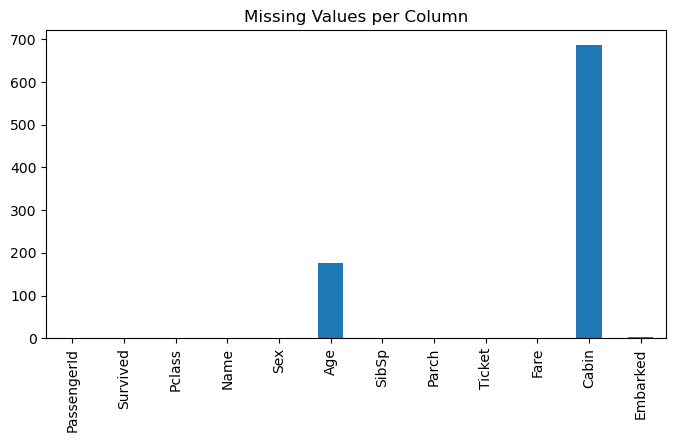

In [14]:
plt.figure(figsize=(8,4))
df.isnull().sum().plot(kind='bar')
plt.title("Missing Values per Column")
plt.show()

In [31]:
num_cols = ['Age','Fare']
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_cols = ['Embarked','Sex','Pclass']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [32]:
print("\nAfter Imputation:\n")
print(df.head())


After Imputation:

   PassengerId  Survived Pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

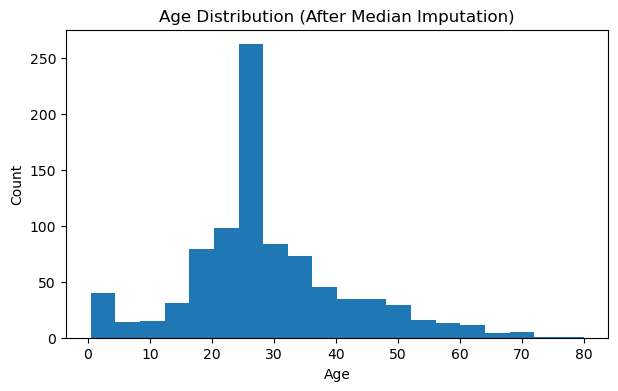

In [28]:
plt.figure(figsize=(7,4))
plt.hist(df['Age'], bins=20)
plt.title("Age Distribution (After Median Imputation)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [33]:
fare = df["Fare"]
z_scores = (fare - fare.mean()) / fare.std()
z_outliers = df[np.abs(z_scores) > 3]

print("\nZ-score Outliers:")
print(z_outliers[['Fare']].head())


Z-score Outliers:
         Fare
27   263.0000
88   263.0000
118  247.5208
258  512.3292
299  247.5208


In [35]:
Q1 = fare.quantile(0.25)
Q3 = fare.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iqr_outliers = df[(fare < lower) | (fare > upper)]

print("\nIQR Outliers:")
print(iqr_outliers[['Fare']].head())


IQR Outliers:
        Fare
1    71.2833
27  263.0000
31  146.5208
34   82.1708
52   76.7292


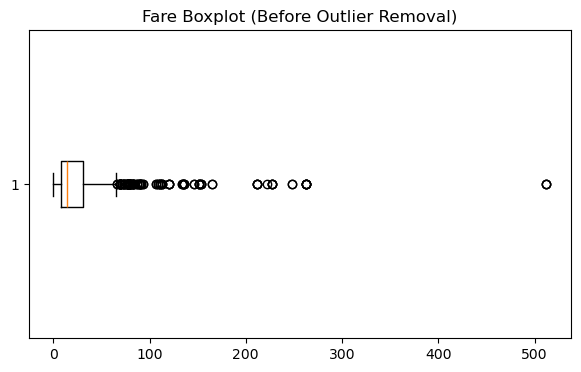

In [36]:
plt.figure(figsize=(7,4))
plt.boxplot(fare, vert=False)
plt.title("Fare Boxplot (Before Outlier Removal)")
plt.show()


Original Rows: 891
After Removing Outliers: 775


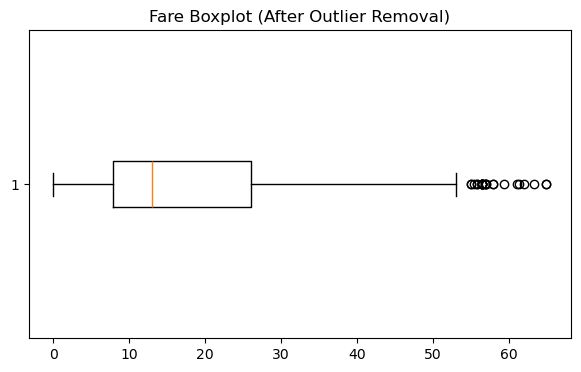


Cleaned Data Sample:
   PassengerId  Survived Pclass                                          Name  \
0            1         0      3                       Braund, Mr. Owen Harris   
2            3         1      3                        Heikkinen, Miss. Laina   
3            4         1      1  Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0      3                      Allen, Mr. William Henry   
5            6         0      3                              Moran, Mr. James   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  
5    male  28.0      0      0            330877   8.4583   NaN        Q  


In [38]:
clean_df = df[(fare >= lower) & (fare <= upper)]
print("\nOriginal Rows:", len(df))
print("After Removing Outliers:", len(clean_df))

# Boxplot after removing outliers
plt.figure(figsize=(7,4))
plt.boxplot(clean_df['Fare'], vert=False)
plt.title("Fare Boxplot (After Outlier Removal)")
plt.show()

print("\nCleaned Data Sample:")
print(clean_df.head())